In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import files


uploaded = files.upload()


Saving spam.csv to spam.csv


In [3]:
data= pd.read_csv('spam.csv', encoding= 'latin-1')

In [4]:
data.shape

(5572, 5)

In [5]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


###data cleaning

In [8]:
## colomn 2,3,4 have very large no. of null values.
## so, we drop these columns

data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [9]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
data.v1.unique()

array(['ham', 'spam'], dtype=object)

In [11]:
## so, column v1 is target column
## it has two objects i.e 'ham' & 'spam'
## we replace this with 0 & 1

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
data['v1']=le.fit_transform(data['v1'])

In [13]:
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
## checking null values
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [15]:
# duplicate values
data.duplicated().sum()

403

In [16]:
data=data.drop_duplicates(keep='first')

In [17]:
data.shape

(5169, 2)

####EDA

In [18]:
data['v1'].value_counts()

0    4516
1     653
Name: v1, dtype: int64

In [19]:
data['v1'].value_counts()/len(data)*100

0    87.366996
1    12.633004
Name: v1, dtype: float64

In [20]:
##   no. of hams is ~ 87%
## & no. of spams is ~ 13%
## so, data is imbalanced

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
## num of characters in each row
data['num_characters']= data['v2'].apply(len)
data.head()

,v1,v2,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
## num of words in row
data['v2'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: v2, Length: 5169, dtype: object

In [25]:
data['num_words']= data['v2'].apply(lambda x:len(nltk.word_tokenize(x)))

data.head()

,v1,v2,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
## num of sentences in rows
data['num_sentences']= data['v2'].apply(lambda x:len(nltk.sent_tokenize(x)))

data.head()

,v1,v2,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [28]:
# for ham
data[data['v1'] == 0] [['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
# for spam
data[data['v1'] == 1] [['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

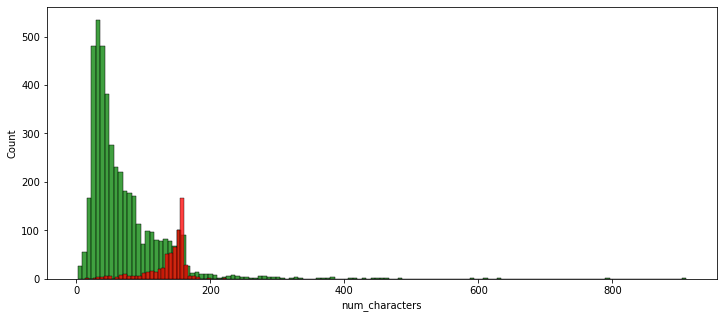

In [31]:
plt.figure(figsize=(12,5))
sns.histplot(data[data['v1'] == 0]['num_characters'],color='green')
sns.histplot(data[data['v1'] == 1]['num_characters'],color='red')

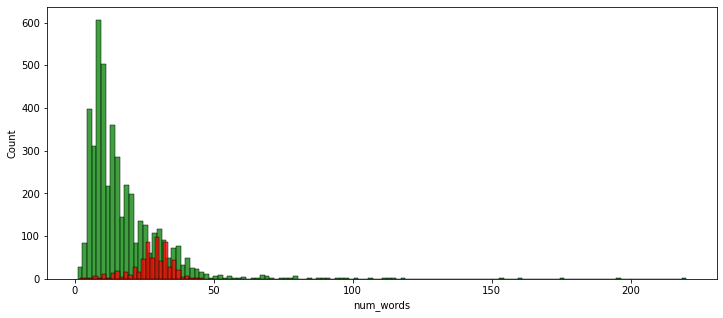

In [32]:
plt.figure(figsize=(12,5))
sns.histplot(data[data['v1'] == 0]['num_words'],color='green')
sns.histplot(data[data['v1'] == 1]['num_words'],color='red')

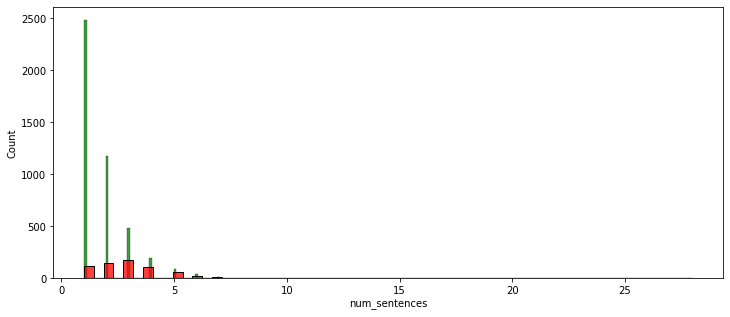

In [33]:
plt.figure(figsize=(12,5))
sns.histplot(data[data['v1'] == 0]['num_sentences'],color='green')
sns.histplot(data[data['v1'] == 1]['num_sentences'],color='red')

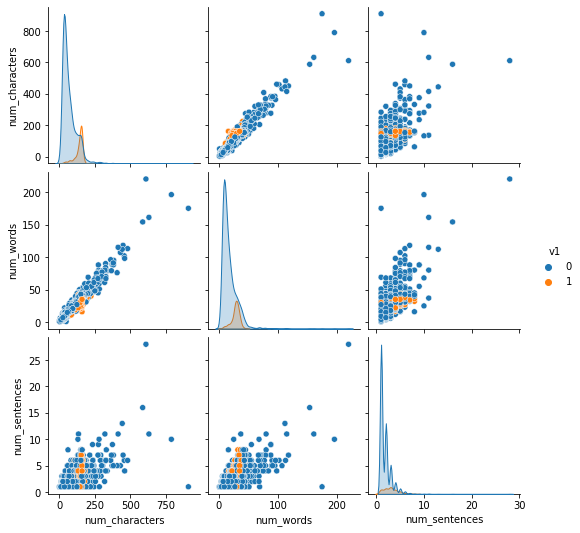

In [34]:
sns.pairplot(data,hue='v1')

In [35]:
data.corr()

,v1,num_characters,num_words,num_sentences
v1,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


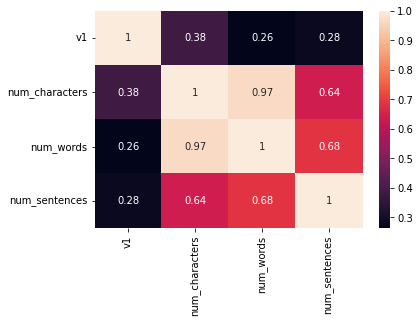

In [36]:
sns.heatmap(data.corr(),annot=True)

###top words in ham & spam
###data pre-processing

1.   lower case 
2.   Tokenization
3.   Removing special characters 
4.   Removing stop words and punctuation 
5.   stemming

In [ ]:
nltk.download('popular')

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

In [39]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
from nltk.stem import PorterStemmer
ps= PorterStemmer()

In [41]:
def transform_text(text):
    word =text.lower()

    word= nltk.word_tokenize(word)

    y=[]
    for i in word:
        if i.isalnum():
            y.append(i)

    word = y[:]
    y.clear()
    for i in word:
        if i not in stopwords.words('english') and i not in  string.punctuation:
            y.append(i)
     
    word = y[:]
    y.clear()
    for i in word:
        stemmed= ps.stem(i)
        y.append(stemmed)

    return " ".join(y)



In [42]:
data['v2'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [43]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [44]:
transformed_v2 = data['v2'].apply(transform_text)
transformed_v2

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: v2, Length: 5169, dtype: object

In [45]:
data['transformed_v2'] = transformed_v2

In [46]:
data.head()

,v1,v2,num_characters,num_words,num_sentences,transformed_v2
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
from wordcloud import WordCloud

In [48]:
wc= WordCloud(width=1000,height=1000,background_color='white',min_font_size=15,collocations=False)

In [49]:
spam_wc = wc.generate(data[data['v1']== 1]['transformed_v2'].str.cat(sep=' '))

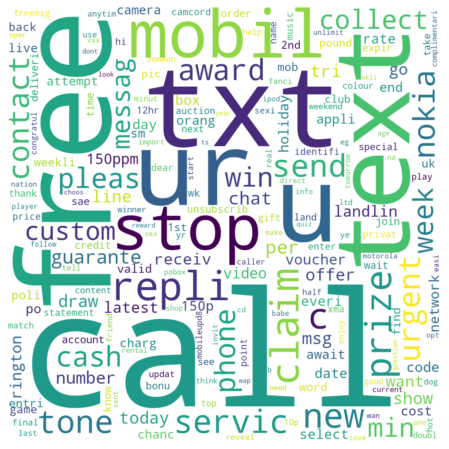

In [50]:
plt.figure(figsize = (8, 8))
plt.imshow(spam_wc, interpolation= 'bilinear')
plt.axis("off")
plt.show()

In [51]:
ham_wc = wc.generate(data[data['v1']== 0]['transformed_v2'].str.cat(sep=' '))

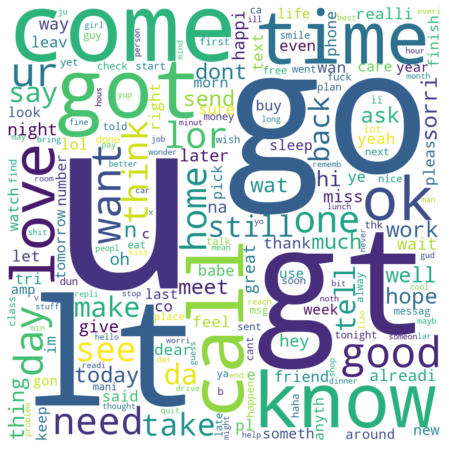

In [52]:
plt.figure(figsize = (8, 8))
plt.imshow(ham_wc, interpolation= 'bilinear')
plt.axis("off")
plt.show()

#### Model building 

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer()

In [54]:
x = tfidf.fit_transform(data['transformed_v2']).toarray()

In [55]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
y=  data['v1'].values

In [57]:
x.shape , y.shape

((5169, 6708), (5169,))

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [60]:
x_train.shape , x_test.shape , y_train.shape ,y_test.shape 

((4135, 6708), (1034, 6708), (4135,), (1034,))

In [61]:
### naive bayes

In [62]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix

In [63]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [64]:
gnb.fit(x_train,y_train)
y_pred1= gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [65]:
mnb.fit(x_train,y_train)
y_pred2= mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [66]:
bnb.fit(x_train,y_train)
y_pred3= bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [67]:
### from above abservations Multinomial naive_bayes gives heighest precission

In [68]:
### SVM

In [69]:
from sklearn.svm import SVC
svc = SVC()

In [70]:
svc.fit(x_train,y_train)
y_pred4= svc.predict(x_test)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.9661508704061895
[[894   2]
 [ 33 105]]
0.9813084112149533


In [71]:
### KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

In [74]:
knc.fit(x_train,y_train)
y_pred5= knc.predict(x_test)
print(accuracy_score(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))
print(precision_score(y_test,y_pred5))

0.9003868471953579
[[896   0]
 [103  35]]
1.0


In [75]:
### Random forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [77]:
rfc.fit(x_train,y_train)
y_pred6= rfc.predict(x_test)
print(accuracy_score(y_test,y_pred6))
print(confusion_matrix(y_test,y_pred6))
print(precision_score(y_test,y_pred6))

0.9729206963249516
[[895   1]
 [ 27 111]]
0.9910714285714286


In [78]:
#### model improvement

In [79]:
#### TF IDF max feature 
#### after many trial and errors, we set max features to 3500

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=3500)

In [128]:
x= tfidf.fit_transform(data['transformed_v2']).toarray()

In [129]:
x.shape

(5169, 3500)

In [130]:
y= data['v1'].values

In [131]:
y.shape

(5169,)

In [132]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [133]:
gnb.fit(x_train,y_train)
mnb.fit(x_train,y_train)
bnb.fit(x_train,y_train)
svc.fit(x_train,y_train)
knc.fit(x_train,y_train)
rfc.fit(x_train,y_train)

y_pred1= gnb.predict(x_test)
print("for gnb")
print('accuracy:' , accuracy_score(y_test,y_pred1))
print('precision:', precision_score(y_test,y_pred1))

y_pred2= mnb.predict(x_test)
print("for mnb")
print('accuracy:' , accuracy_score(y_test,y_pred2))
print('precision:', precision_score(y_test,y_pred2))

y_pred3= bnb.predict(x_test)
print("for bnb")
print('accuracy:' , accuracy_score(y_test,y_pred3))
print('precision:', precision_score(y_test,y_pred3))

y_pred4= svc.predict(x_test)
print("for svc")
print('accuracy:' , accuracy_score(y_test,y_pred4))
print('precision:', precision_score(y_test,y_pred4))

y_pred5= knc.predict(x_test)
print("for knc")
print('accuracy:' , accuracy_score(y_test,y_pred5))
print('precision:', precision_score(y_test,y_pred5))

y_pred6= rfc.predict(x_test)
print("for rfc")
print('accuracy:' , accuracy_score(y_test,y_pred6))
print('precision:', precision_score(y_test,y_pred6))


for gnb
accuracy: 0.8762088974854932
precision: 0.5231481481481481
for mnb
accuracy: 0.9700193423597679
precision: 1.0
for bnb
accuracy: 0.9816247582205029
precision: 0.9917355371900827
for svc
accuracy: 0.9709864603481625
precision: 0.9821428571428571
for knc
accuracy: 0.9052224371373307
precision: 1.0
for rfc
accuracy: 0.9729206963249516
precision: 0.9910714285714286


In [113]:
#### after setting max features to 3500,
#### Multinomial navie bayes accuracy & precission increases

In [114]:
## multinomial naive bayes gives hightest precision and accuracy

In [109]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier
mnb = MultinomialNB()
svc = SVC(probability=True, random_state=2)
rfc = RandomForestClassifier(random_state=2)

In [110]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('rf', rfc)],voting='soft')

In [116]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm', SVC(probability=True, random_state=2)),
                             ('nb', MultinomialNB()),
                             ('rf', RandomForestClassifier(random_state=2))],
                 voting='soft')

In [117]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9754098360655737


In [115]:
#### Voting classier didn't perform well compare to max feature setting

In [123]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [125]:
import pickle

In [134]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))

In [135]:
pickle.dump(mnb,open('model.pkl','wb'))